In [1]:
from sqlalchemy import *
import numpy as np
import pylab as plt
import pandas as pd
%matplotlib inline

In [2]:
engine = create_engine('sqlite+pysqlite:///../SQL/75_8.db')
import time
start_time = time.time()
#ADCdf = pd.io.sql.read_sql("SELECT * FROM ADC", engine)
#Hitdf = pd.io.sql.read_sql("SELECT * FROM Hit", engine)
#PSAdf = pd.io.sql.read_sql("SELECT * FROM PSA", engine)
ProtoMapdf = pd.io.sql.read_sql("SELECT * FROM ProtoMap", engine)
RawADCdf = pd.io.sql.read_sql("SELECT * FROM RawADC", engine)
end_time = time.time()
print end_time-start_time

254.170580864


In [6]:
ADCdf = pd.io.sql.read_sql("SELECT * FROM ADC", engine)

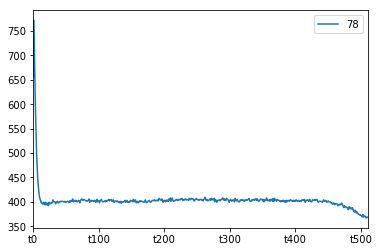

In [20]:
RawADCdf[(RawADCdf['EventID']==0)&(RawADCdf['PadNum']==70)].iloc[:,3:].T.plot()

(-15, 15)

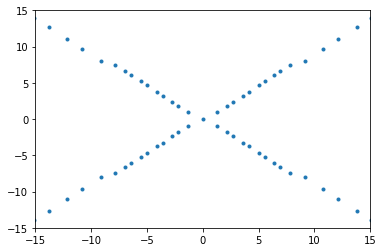

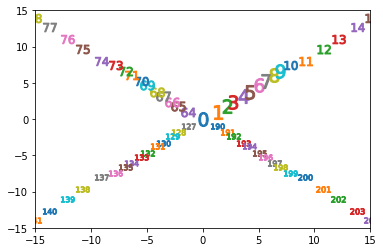

In [4]:
#print ProtoMapdf
plt.scatter(ProtoMapdf.iloc[:252]['PadX'],ProtoMapdf.iloc[:252]['PadY'],marker='.')
plt.xlim([-15,15])
plt.ylim([-15,15])
plt.figure()
for row in ProtoMapdf.iloc[:252].iterrows():
    plt.scatter(row[1]['PadX'],row[1]['PadY'],marker='${}$'.format(row[1]['PadNum']),s=200) 
plt.xlim([-15,15])
plt.ylim([-15,15])

In [7]:
def Process(Event):
    mesh = Event.iloc[:,3:][Event.iloc[:,3:]>20].sum(axis=0)
    #print mesh
    return mesh
start_time = time.time()
mesh_df = ADCdf.groupby('EventID').apply(Process)
end_time = time.time()
print end_time-start_time

def convolve(event):
    mesh_convol = np.convolve(event.values,([1]*10)[::-1],'same')
    return pd.Series(mesh_convol,index=['t'+str(i) for i in range(512)])
convol_df=mesh_df.apply(convolve,axis=1)
convol_df.reset_index(inplace=True)

10.0959479809


In [8]:
Hitdf = pd.io.sql.read_sql("SELECT * FROM Hit", engine)

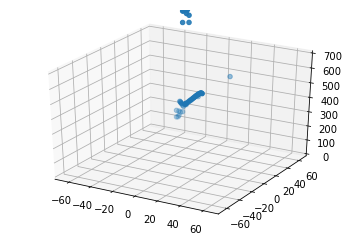

In [67]:
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
dftmp = Hitdf[(Hitdf['EventID']==1)&(Hitdf['charge']>30)]
ax = plt.subplot(111, projection='3d')
ax.scatter(dftmp['x'],dftmp['y'],dftmp['z'])
ax.set_zlim([0,700]);
ax.set_xlim([-70,70]);
ax.set_ylim([-70,70]);

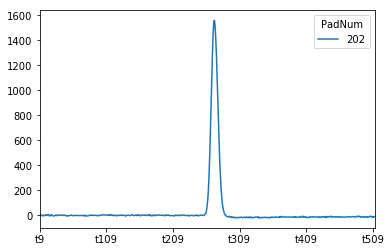

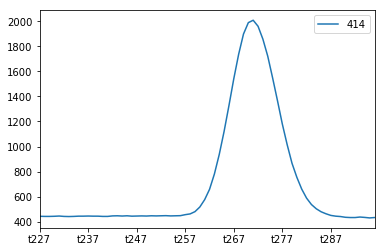

In [66]:
EID=1
PadNum = 202
tmpdf = ADCdf[(ADCdf['EventID']==EID)].iloc[:,2:]
tmpdf =  tmpdf[tmpdf.iloc[:,10:-10].max(axis=1)>50]
%matplotlib inline
tmpdf=tmpdf.set_index(tmpdf['PadNum'])
#tmpdf
tmpdf[(tmpdf['PadNum']>=PadNum)&(tmpdf['PadNum']<=PadNum)].iloc[:,10:].T.plot()
#tmpdf.iloc[60:70,1:].T.plot()
plt.figure()
RawADCdf[(RawADCdf['EventID']==EID)&(RawADCdf['PadNum']==PadNum)].iloc[:,230:300].T.plot()
#tmpdf['PadNum']

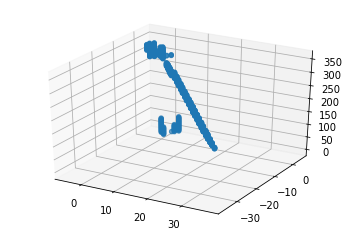

In [37]:
EID=1
adc_map_df = pd.merge(ADCdf[ADCdf['EventID']==EID],ProtoMapdf,on='PadNum')
hitdf = pd.melt(adc_map_df,id_vars=['EventID','PadNum','PadX','PadY'],value_vars=['t'+str(i) for i in range(512)])
hitdf.columns = ['EventID','PadNum','PadX','PadY','PadZ','C']
hitdf['PadZ']=hitdf['PadZ'].str.lstrip('t').astype(np.int)
tmpdf = hitdf[hitdf['C']>50]

#hitdf['C'].hist(bins=100)
#plt.gca().set_yscale('log')
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
ax = plt.subplot(111, projection='3d')
ax.scatter(tmpdf['PadX'],tmpdf['PadY'],tmpdf['PadZ'])
#ax.set_xlim([-10,10])
#ax.set_ylim([0,700])
#ax.set_zlim([100,500])

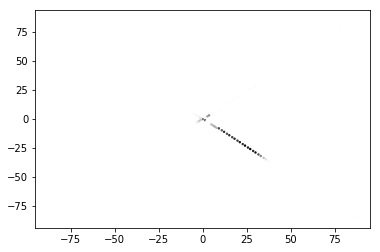

In [38]:
sub1 = ADCdf[ADCdf['EventID']==1]
sub2 = pd.merge(sub1,ProtoMapdf,on='PadNum')
sub2['total'] = sub2.iloc[:,3:515][sub2.iloc[:,3:515]>20].sum(axis=1)
c = sub2['total'].values/max(sub2['total'])
plt.scatter(sub2['PadX'],sub2['PadY'],s=2,c=zip(1-c,1-c,1-c))
#plt.xlim([-10,10])
#plt.ylim([-10,10])

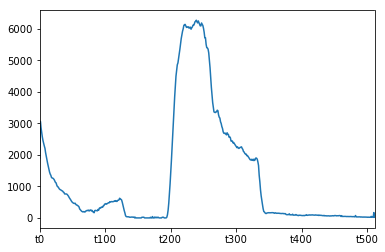

In [17]:
mesh_df.ix[0].T.plot()